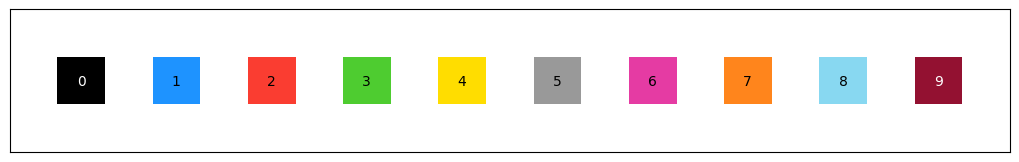

In [1]:
import sys
import json
import shutil
sys.path.append("../inputs/google-code-golf-2025/code_golf_utils")
from code_golf_utils import *
show_legend()

In [2]:
def get_examples(task_num):
    examples = load_examples(task_num)
    show_examples(examples['train'] + examples['test'])
    return examples

def save_file(task_num, sub_dir="/kaggle/working/submission/"):
    task_path = os.path.join(sub_dir, f"task{task_num:03d}.py")
    os.makedirs(sub_dir, exist_ok=True)
    shutil.copy("task.py", task_path)
    
def show_grid(out_grid, in_grid, ans_grid, figsize=(12, 4), k=-0.11):
    # Colors for each index
    colors = [
        (0, 0, 0),
        (30, 147, 255),
        (250, 61, 49),
        (78, 204, 48),
        (255, 221, 0),
        (153, 153, 153),
        (229, 59, 163),
        (255, 133, 28),
        (136, 216, 241),
        (147, 17, 49),
    ]
    colors = [(r/255, g/255, b/255) for r, g, b in colors]

    def plot_ax(ax, arr):
        rows = len(arr)
        cols = len(arr[0])
        # Draw each cell
        for y in range(rows):
            for x in range(cols):
                color = colors[arr[y][x]]
                rect = plt.Rectangle((x, y), 1, 1, facecolor=color, edgecolor="white")
                ax.add_patch(rect)

        # Axis limits
        ax.set_xlim(0, cols)
        ax.set_ylim(0, rows)
        # Center ticks in each cell
        ax.set_xticks([i + 0.5 for i in range(cols)])
        ax.set_yticks([i + 0.5 for i in range(rows)])
        # Label ticks as integers
        ax.set_xticklabels(range(cols))
        ax.set_yticklabels(range(rows))
        ax.tick_params(axis='both', length=0)
        # Move x-axis labels to top
        ax.xaxis.tick_top()
        ax.xaxis.set_label_position('top')
        # Invert y-axis so 0 is at the top
        ax.invert_yaxis()
        # Square cells
        ax.set_aspect('equal')

    fig, ax = plt.subplots(1, 3, figsize=figsize)
    plot_ax(ax[0],out_grid)
    ax[0].set_title("Output",y=k)
    plot_ax(ax[1], in_grid)
    ax[1].set_title("Input",y=k)
    plot_ax(ax[2],ans_grid)
    ax[2].set_title("Answer",y=k)
    plt.show()

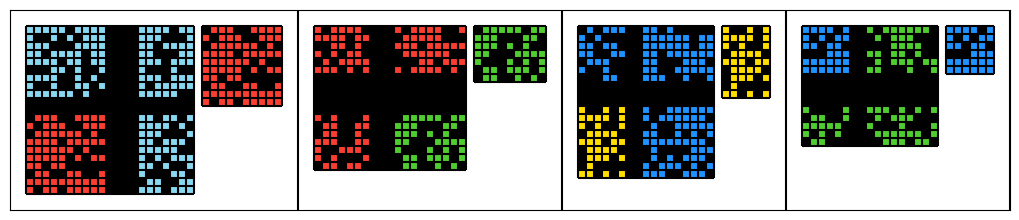

In [3]:
task_num = 14
examples = get_examples(task_num)

In [4]:
def p(g):
    """
    ARC Task: Extract the quadrant with different number pattern
    
    Input: Grid divided into 4 quadrants separated by rows/columns of zeros
    Output: The quadrant that has a different number distribution pattern
    """
    height = len(g)
    width = len(g[0])
    
    # Step 1: Find separator rows and columns (filled with zeros)
    separator_rows = []
    separator_cols = []
    
    for r in range(height):
        if all(cell == 0 for cell in g[r]):
            separator_rows.append(r)
    
    for c in range(width):
        if all(g[r][c] == 0 for r in range(height)):
            separator_cols.append(c)
    
    # Step 2: Determine quadrant boundaries
    row_split = min(separator_rows)
    col_split = min(separator_cols) 
    row_split2 = max(separator_rows) + 1
    col_split2 = max(separator_cols) + 1
    
    # Step 3: Extract the 4 quadrants
    top_left = []
    top_right = []
    bottom_left = []
    bottom_right = []
    
    for r in range(row_split):
        top_left.append(g[r][:col_split])
        top_right.append(g[r][col_split2:])
    
    for r in range(row_split2, height):
        bottom_left.append(g[r][:col_split])
        bottom_right.append(g[r][col_split2:])
    
    # Step 4: Analyze number distribution in each quadrant
    def get_number_set(quadrant):
        """Get unique numbers in quadrant"""
        numbers = set()
        for row in quadrant:
            for cell in row:
                numbers.add(cell)
        return numbers
    
    quadrants = [
        (top_left, "top_left"),
        (top_right, "top_right"), 
        (bottom_left, "bottom_left"),
        (bottom_right, "bottom_right")
    ]
    
    # Step 5: Find the quadrant with different pattern
    number_patterns = []
    for quadrant, name in quadrants:
        pattern = get_number_set(quadrant)
        number_patterns.append((quadrant, pattern, name))
    
    # Step 6: Identify unique pattern
    for i, (quad_i, pattern_i, name_i) in enumerate(number_patterns):
        different_count = 0
        for j, (quad_j, pattern_j, name_j) in enumerate(number_patterns):
            if i != j and pattern_i != pattern_j:
                different_count += 1
        
        # If this quadrant differs from most others, return it
        if different_count >= 2:  # Different from at least 2 others
            return quad_i
    
    # Fallback: if no clear unique pattern, return bottom_left
    return bottom_left

In [12]:
def p(g):
 h,w=len(g),len(g[0]);R=[r for r in range(h)if all(g[r][c]==0for c in range(w))];C=[c for c in range(w)if all(g[r][c]==0for r in range(h))];a,b,c,d=min(R),max(R)+1,min(C),max(C)+1;Q=[[g[r][:c]for r in range(a)],[g[r][d:]for r in range(a)],[g[r][:c]for r in range(b,h)],[g[r][d:]for r in range(b,h)]];S=[{x for r in q for x in r}for q in Q];return next((Q[i]for i,s in enumerate(S)if sum(s!=S[j]for j in range(4)if i!=j)>=2),Q[2])

In [13]:
with open("../inputs/google-code-golf-2025/task014.json", "r", encoding="utf-8") as f:
  task_data = json.load(f)

example = task_data["train"][0]
input_grid = example["input"]
expected_output = example["output"]
actual_output = p(input_grid)

is_correct = actual_output == expected_output
status = "✓ 成功" if is_correct else "✗ 失敗"

print(input_grid)
print(expected_output)
print(actual_output)
print(status)

[[8, 8, 8, 8, 8, 0, 8, 8, 8, 8, 0, 0, 0, 0, 8, 8, 8, 8, 0, 8, 8], [8, 0, 0, 8, 0, 8, 0, 8, 8, 8, 0, 0, 0, 0, 8, 8, 8, 0, 0, 0, 8], [8, 8, 8, 0, 0, 0, 8, 8, 8, 8, 0, 0, 0, 0, 8, 8, 0, 8, 8, 8, 8], [8, 8, 0, 8, 8, 8, 8, 0, 8, 8, 0, 0, 0, 0, 8, 8, 0, 0, 0, 8, 8], [8, 8, 8, 8, 0, 8, 8, 0, 8, 8, 0, 0, 0, 0, 8, 8, 8, 0, 8, 8, 8], [0, 0, 0, 8, 8, 0, 8, 0, 0, 8, 0, 0, 0, 0, 8, 0, 0, 0, 8, 0, 0], [8, 8, 8, 8, 0, 0, 8, 0, 8, 0, 0, 0, 0, 0, 8, 8, 8, 0, 8, 8, 8], [8, 0, 0, 8, 0, 0, 8, 8, 0, 8, 0, 0, 0, 0, 8, 0, 8, 8, 8, 8, 8], [8, 8, 8, 8, 8, 8, 0, 8, 0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 8, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 8, 8, 0, 8, 8, 0, 8], [2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 8, 8, 8, 8, 0, 8, 0], [0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 8, 8, 8, 0, 0, 0, 8], [2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 8, 8, 0, 8, 8, 8, 0], [2, 2, 2, 2, 2, 2, 0, 2,

In [14]:
def test_json():
  with open("../inputs/google-code-golf-2025/task014.json", "r", encoding="utf-8") as f:
    task_data = json.load(f)
  
  train_success = 0
  for i, example in enumerate(task_data["train"]):
      input_grid = example["input"]
      expected_output = example["output"]
      actual_output = p(input_grid)
      
      is_correct = actual_output == expected_output
      status = "✓ 成功" if is_correct else "✗ 失敗"
      
      print(f"Train例{i+1}: {status}")
      if is_correct:
          train_success += 1

  print(f"訓練データの成功率: {train_success}/{len(task_data['train'])}")

  test_success = 0
  for i, example in enumerate(task_data["test"]):
      input_grid = example["input"]
      expected_output = example["output"]
      actual_output = p(input_grid)
      
      is_correct = actual_output == expected_output
      status = "✓ 成功" if is_correct else "✗ 失敗"
      
      print(f"Test例{i+1}: {status}")
      if is_correct:
          test_success += 1

  print(f"テストデータの成功率: {test_success}/{len(task_data['test'])}")

In [11]:
test_json()

Train例1: ✓ 成功
Train例2: ✓ 成功
Train例3: ✓ 成功
訓練データの成功率: 3/3
Test例1: ✓ 成功
テストデータの成功率: 1/1
